In [42]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [4]:
SHAPEFILE = '/Users/mmestres/Desktop/tl_2021_us_state/tl_2021_us_state.shp'

In [7]:
geo_df =  gpd.read_file(SHAPEFILE)

<AxesSubplot:>

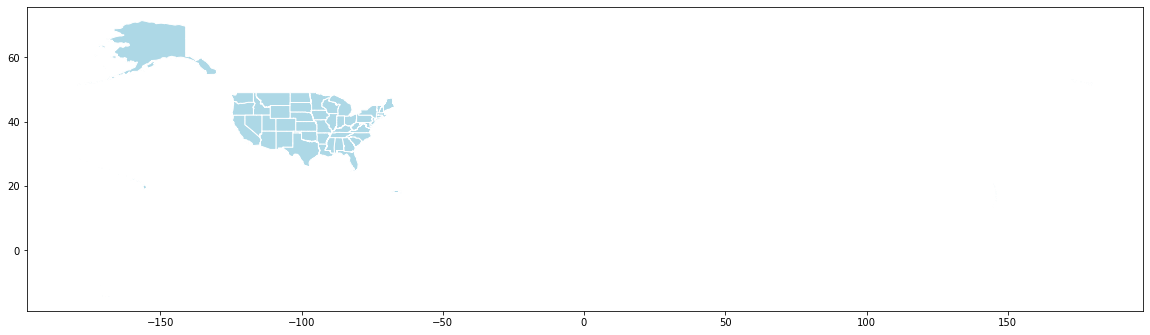

In [13]:
geo_df.plot(figsize=(20, 20), edgecolor='white', linewidth=1, color='lightblue')

In [15]:
import pandas as pd
import random
from faker import Faker
from random import randrange
from datetime import datetime

In [205]:
nr_of_states = 5000

fake = Faker('en_US')

states = []

for states_id in range(nr_of_states):
    
    d1 = datetime.strptime(f'1/1/2021', '%m/%d/%Y')
    d2 = datetime.strptime(f'10/31/2021', '%m/%d/%Y')
    date = fake.date_between(d1, d2)
    
    state = fake.state_abbr()
    
    claim_volume = fake.pyfloat(right_digits=False, positive=True, min_value=10, max_value=100000)
    
    states.append([date, state, claim_volume])
    
states_df = pd.DataFrame(states, columns=['date', 'state', 'claim_volume'])

pd.pandas.set_option('display.max_columns', None)
print(states_df)

            date state  claim_volume
0     2021-10-26    HI       21498.0
1     2021-04-20    HI       77228.0
2     2021-05-27    PA       61754.0
3     2021-06-12    MD       28475.0
4     2021-03-09    MI       66591.0
...          ...   ...           ...
4995  2021-09-22    KY       29043.0
4996  2021-01-10    NJ       80641.0
4997  2021-03-10    RI       74130.0
4998  2021-02-24    PA       95947.0
4999  2021-08-28    VT       90187.0

[5000 rows x 3 columns]


In [27]:
geo_df = geo_df.drop(geo_df.loc[geo_df['STUSPS'] == "AK"].index)

In [29]:
geo_df = geo_df.drop(geo_df.loc[geo_df['STUSPS'] == "HI"].index)

In [31]:
geo_df = geo_df.drop(geo_df.loc[geo_df['STUSPS'] == "PR"].index)

In [38]:
merged_df = pd.merge(left=geo_df, right=states_df, how='left', left_on='STUSPS', right_on='state')

In [39]:
merged_df.head(3)

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,date,state,claim_volume
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266298634,489204185,+38.6472854,-080.6183274,"POLYGON ((-80.85847 37.42831, -80.85856 37.428...",2021-05-04,WV,39838.0
1,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266298634,489204185,+38.6472854,-080.6183274,"POLYGON ((-80.85847 37.42831, -80.85856 37.428...",2021-03-29,WV,41589.0
2,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266298634,489204185,+38.6472854,-080.6183274,"POLYGON ((-80.85847 37.42831, -80.85856 37.428...",2021-10-14,WV,78389.0


(22.0, 50.0)

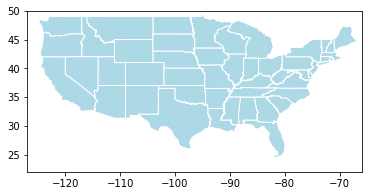

In [53]:
ax = geo_df.plot(edgecolor='white', linewidth=1, color='lightblue')

minx, miny, maxx, maxy = geo_df.total_bounds
ax.set_xlim([-127,-66])
ax.set_ylim(22, 50)

In [206]:
states_df.date = pd.to_datetime(states_df.date)

In [158]:
display(states_df)

,date,state,claim_volume
0,2021-08-27,OH,49632.0
1,2021-07-19,MN,65308.0
2,2021-08-20,NV,89827.0
3,2021-02-23,DE,34830.0
4,2021-07-04,CT,59213.0
...,...,...,...
995,2021-04-02,KY,49999.0
996,2021-02-14,WA,21076.0
997,2021-05-25,DE,80301.0
998,2021-02-07,MT,56129.0


In [207]:
m_states_df = states_df[states_df.date.dt.month == 10]
m_states_df = m_states_df.groupby('state').sum()

In [162]:
display(geo_df)

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266298634,489204185,+38.6472854,-080.6183274,"POLYGON ((-80.85847 37.42831, -80.85856 37.428..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138961722096,45972570361,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778561906,6216493488,+40.1028754,-089.1526108,"POLYGON ((-89.17208 37.06831, -89.17296 37.067..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206232627084,18949394733,+46.3159573,-094.1996043,"POLYGON ((-92.74568 45.29604, -92.74629 45.295..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151992308,6979074857,+38.9466584,-076.6744939,"POLYGON ((-75.76659 39.37756, -75.76630 39.373..."
5,1,1,44,01219835,44,RI,Rhode Island,00,G4000,A,2677763359,1323686988,+41.5964850,-071.5264901,"MULTIPOLYGON (((-71.67881 41.15891, -71.67626 ..."
6,4,8,16,01779783,16,ID,Idaho,00,G4000,A,214049931578,2391569647,+44.3484222,-114.5588538,"POLYGON ((-111.04547 43.50105, -111.04540 43.4..."
7,1,1,33,01779794,33,NH,New Hampshire,00,G4000,A,23190115212,1025971768,+43.6726907,-071.5843145,"POLYGON ((-71.24548 42.74251, -71.24809 42.740..."
8,3,5,37,01027616,37,NC,North Carolina,00,G4000,A,125933327733,13456093195,+35.5397100,-079.1308636,"POLYGON ((-76.91598 36.54388, -76.91620 36.544..."
9,1,1,50,01779802,50,VT,Vermont,00,G4000,A,23872569964,1030754609,+44.0589536,-072.6710173,"POLYGON ((-72.43462 43.23326, -72.43436 43.232..."


In [151]:
from sklearn import preprocessing
import numpy as np

In [208]:
d = m_states_df['claim_volume'].values.reshape(-1,1)

In [209]:
b = preprocessing.normalize(d, axis=0)
scaled_df = m_states_df
scaled_df['scaled'] = b

In [210]:
merged_df2 = pd.merge(left=geo_df, right=scaled_df, how='left', left_on='STUSPS', right_on='state')

In [211]:
display(merged_df2)

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,claim_volume,scaled
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266298634,489204185,+38.6472854,-080.6183274,"POLYGON ((-80.85847 37.42831, -80.85856 37.428...",477158.0,0.127134
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138961722096,45972570361,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ...",549040.0,0.146286
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778561906,6216493488,+40.1028754,-089.1526108,"POLYGON ((-89.17208 37.06831, -89.17296 37.067...",536581.0,0.142967
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206232627084,18949394733,+46.3159573,-094.1996043,"POLYGON ((-92.74568 45.29604, -92.74629 45.295...",497607.0,0.132582
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151992308,6979074857,+38.9466584,-076.6744939,"POLYGON ((-75.76659 39.37756, -75.76630 39.373...",564573.0,0.150425
5,1,1,44,01219835,44,RI,Rhode Island,00,G4000,A,2677763359,1323686988,+41.5964850,-071.5264901,"MULTIPOLYGON (((-71.67881 41.15891, -71.67626 ...",593727.0,0.158193
6,4,8,16,01779783,16,ID,Idaho,00,G4000,A,214049931578,2391569647,+44.3484222,-114.5588538,"POLYGON ((-111.04547 43.50105, -111.04540 43.4...",353623.0,0.094219
7,1,1,33,01779794,33,NH,New Hampshire,00,G4000,A,23190115212,1025971768,+43.6726907,-071.5843145,"POLYGON ((-71.24548 42.74251, -71.24809 42.740...",393675.0,0.104891
8,3,5,37,01027616,37,NC,North Carolina,00,G4000,A,125933327733,13456093195,+35.5397100,-079.1308636,"POLYGON ((-76.91598 36.54388, -76.91620 36.544...",276341.0,0.073628
9,1,1,50,01779802,50,VT,Vermont,00,G4000,A,23872569964,1030754609,+44.0589536,-072.6710173,"POLYGON ((-72.43462 43.23326, -72.43436 43.232...",529643.0,0.141118


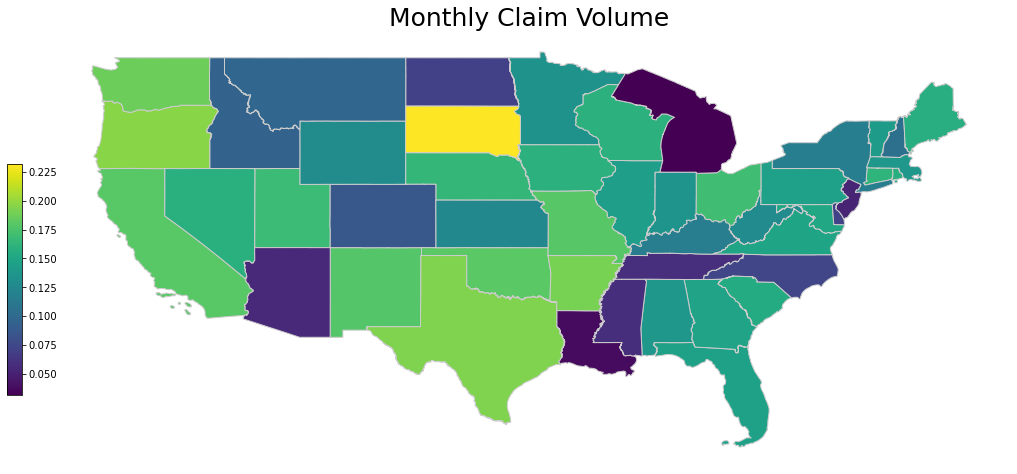

In [212]:
title = 'Monthly Claim Volume'
col = 'scaled'

vmin = merged_df2[col].min()
vmax = merged_df2[col].max()
cmap = 'viridis'

# Create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 8))

# Remove the axis
ax.axis('off')
merged_df2.plot(column=col, ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap)

# Add a title
ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})
            
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)

# Empty array for the data range
sm._A = []

# Add the colorbar to the figure
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)

In [ ]:
def create_heatmap(state, month):
    
    
    
    
    merged_df = pd.merge(left=geo_df, right=states_df, how='left', left_on='STUSPS', right_on='state')
    
    ax = geo_df.plot(edgecolor='white', linewidth=1, color='lightblue')

    minx, miny, maxx, maxy = geo_df.total_bounds
    ax.set_xlim([-127,-66])
    ax.set_ylim(22, 50)